In [148]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean


In [138]:
# Import csv file containing key Google Trend words
parse_date = ['Week']
trd = pd.read_csv('multiTimeline.csv',sep=',',skiprows=1,parse_dates=parse_date)
trd.rename(columns={'Week':'Date'},inplace=True)
trd.set_index('Date',inplace=True)

In [139]:
trd = trd.rename(columns={col: col.split(':')[0] for col in trd.columns})

In [141]:
# import several tech stocks 
tickers = ['AAPL','AMZN','MSFT','GOOGL','FB','TSLA']
data_src = 'yahoo'
start_date = '2012-11-01'
end_date = '2017-10-26'
mydata = data.DataReader(tickers, data_src, start_date, end_date)

In [142]:
prices = mydata['Adj Close']
prices = prices.resample('W').mean()
prices = prices.shift(-1).dropna()

In [143]:
# create one random walk as a comparison to show the correlations with trending terms 
step = 5*np.random.randn(prices.shape[0])
walk = np.cumsum(step)
prices['walk'] = walk

In [186]:
d = prices.join(trd) # join two dataframes

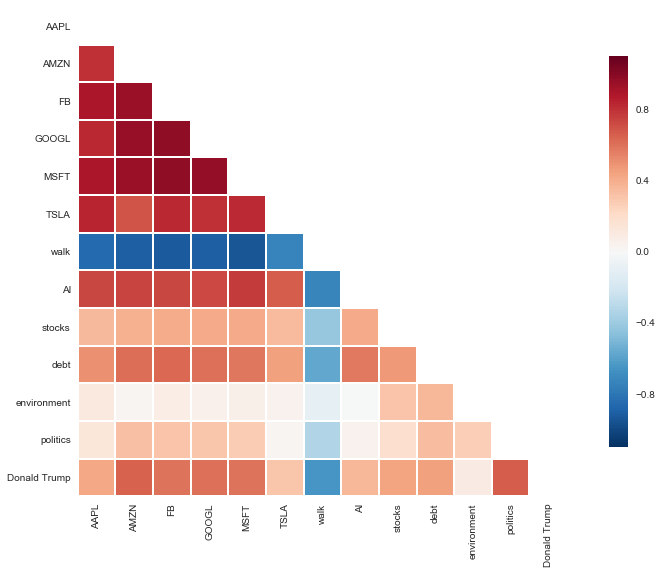

In [145]:
sns.set(style="white")
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, n=20,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1.1, center=0.0,
            square=True, linewidths=1., cbar_kws={"shrink": .8})
plt.show()



From the heatmap above, we can observe that the techology stocks have been highly correlated with the term "AI", even greater than financial terms like "stocks" and "debt". Interestingly, politics terms like "Donald Trump" is also positively correlated with tech stocks. On the other hands, neutral words like "environment" show almost no correlations with the price of stocks.

It is believed that this pattern can be learned from massive datasets both on stocks prices and terms from Google Trend through machine learning techniques. After successfully finding such correlations, a trading strategy can be built based on the above observation. The horizon of this strategy's market edge can be counted in terms of days.

In [182]:
def log_diff(x):
    return np.diff(np.log(x))


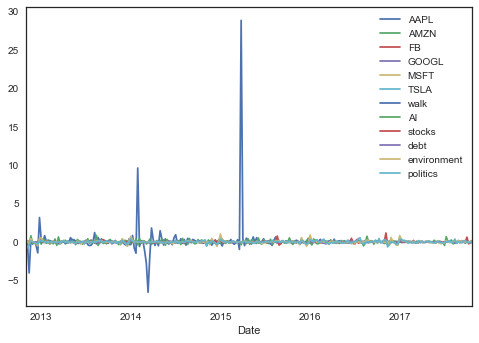

In [184]:
dpct = d.iloc[:,:-1].pct_change().fillna(0)
#dpct.replace([np.inf, -np.inf], np.nan)
#dpct = dpct.fillna(0)
dpct.plot()
plt.show()
#np.sum(dpct.isnull())


In [185]:
l = len(dpct.columns)
dtw = np.zeros((l,l))
for i in range(l):
    for j in range(l):
           dtw[i,j],_ = fastdtw(dpct.iloc[:,i],dpct.iloc[:,j],dist=euclidean)


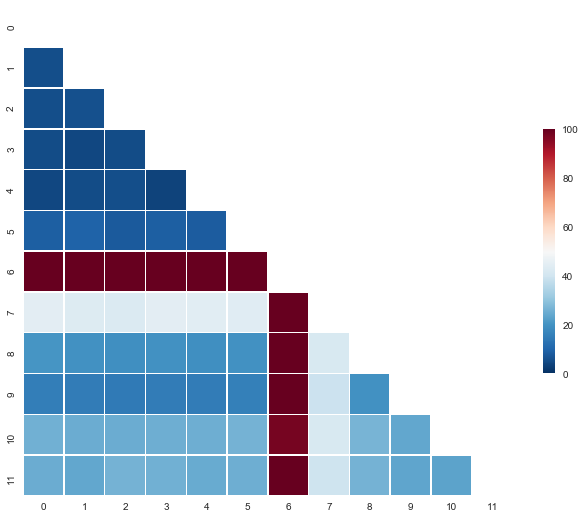

In [180]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(dtw, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, n=20,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dtw, mask=mask,  vmax=100, center=50,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()